In [30]:
#PRINTING VERSION OF SDK
!pip show amazon-braket-sdk | grep Version

#Import Braket Libraries
from braket.circuits import Circuit, Gate, Moments
from braket.circuits.instruction import Instruction 
from braket.aws import AwsDevice
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt
import time

Version: 1.56.0


In [3]:
#  SETTING UP DEVICE : LOCAL SIMULATOR OR ON DEMAND SIMULATOR
device = LocalSimulator()
#for SV1 simulator
# device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")


In [4]:
#Function to run quantum task ,check the status thereof and collect results
def get_result(device, circ):
    #number of qubits
    num_qubits = circ.qubit_count
    
    #specifying desired result types
    circ.probability()
    
    #submit quantum task : define quantum task (asynchronous)
    if device.name == 'StateVectorSimulator':
        task = device.run(circ, shots=1000)
    else:
        task = device.run(circ, shots=1000)
        
    #Get ID of submitted quantum task 
    task_id = task.id
    print("TASK ID" ,task_id)
    
    #Wait for the job to complete
    status_list = []
    status = task.state()
    print("isko hatao",status)
    status_list +=[status]
    print('Status:',status)
    
    #Only notify the user when there's a status change
    while status !='COMPLETED':
        status = task.state()
        if status!=status_list[-1]:
            print('Status :',status)
        status_list += [status]
        
    #get result
    result = task.result()
    
    #get metadata
    metadata = result.task_metadata
    
    #get output probabilities
    probs_values = result.values[0]
    
    #get measurement results
    measurement_counts = result.measurement_counts
    
    # print measurement results
    print('measurement_counts:', measurement_counts)
    
    #bitstrings
    print('measurement_counts:', measurement_counts)

    # bitstrings
    format_bitstring = '{0:0' + str(num_qubits) + 'b}'
    bitstring_keys = [format_bitstring.format(ii) for ii in range(2**num_qubits)]

    # plot probabalities
    plt.bar(bitstring_keys, probs_values)
    plt.xlabel('bitstrings')
    plt.ylabel('probability')
    plt.xticks(rotation=90)
    plt.show() 
    
    return measurement_counts

In [5]:
''' CREATING  A BELL PAIR'''

' CREATING  A BELL PAIR'

In [6]:
circ = Circuit()
circ.h([0])
circ.cnot(0,1)  

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1)])

In [9]:
'''Define Sender's encoding scheme according to the table above.  Sender selects one of these messages to send.   ''' 

"Define Sender's encoding scheme according to the table above.  Sender selects one of these messages to send.   "

In [18]:
message = {"00" : Circuit().i(0),
           "01" : Circuit().x(0),
           "10" : Circuit().z(0),
           "11" : Circuit().x(0).z(0)
          }

In [11]:
''' SENDER ENCODES HER MESSAGE BY APPLYINH THE GATES DEFINED ABOVE'''

' SENDER ENCODES HER MESSAGE BY APPLYINH THE GATES DEFINED ABOVE'

In [24]:
# Selecting the message to send in AB form
m = "11"
# Encoding the message
circ.add_circuit(message[m])


Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Z('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1

In [20]:
''' SENDER THEN SENDS HER QUBIT TO RECEIVER SO THAT RECEIVER HAS BOTH QUBITS IN HIS LAB . RECEIVER DECODES SENDER'S MESSAGE BY DISENTANGLING THE TWO QUBITS'''

" SENDER THEN SENDS HER QUBIT TO RECEIVER SO THAT RECEIVER HAS BOTH QUBITS IN HIS LAB . RECEIVER DECODES SENDER'S MESSAGE BY DISENTANGLING THE TWO QUBITS"

In [25]:
# DISENTANGLING TO DECODE 
circ.cnot(0,1)
circ.h([0])

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(0), Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Z('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1

In [26]:
print(circ)

T  : |0|1|2|3|4|5|6|7|8|9|10|
                             
q0 : -H-C-X-C-H-X-Z-X-Z-C-H--
        |   |           |    
q1 : ---X---X-----------X----

T  : |0|1|2|3|4|5|6|7|8|9|10|


In [ ]:
'''By measuring the two qubits in the computational basis, The receiver can read off Sender's two qubit message

TASK ID c4f137ea-b62d-455c-a450-984c27a17de2
isko hatao COMPLETED
Status: COMPLETED
measurement_counts: Counter({'01': 503, '11': 497})
measurement_counts: Counter({'01': 503, '11': 497})


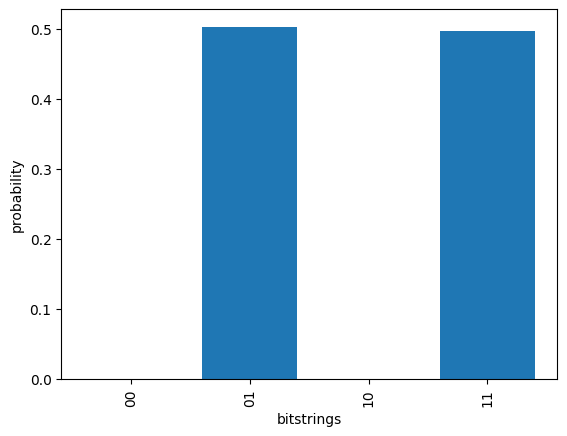

Counter({'01': 503, '11': 497})


In [27]:
counts = get_result(device,circ)
print(counts)

TASK ID bca673e7-c896-40fa-aa70-2493153c9612
isko hatao COMPLETED
Status: COMPLETED
measurement_counts: Counter({'00': 1000})
measurement_counts: Counter({'00': 1000})


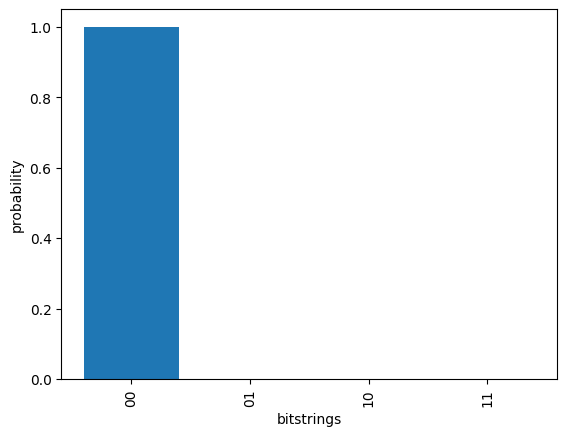

Message: 00. Results: 
Counter({'00': 1000})
TASK ID 6f68c8dc-ccbe-4745-98f6-3fc0aeb6542a
isko hatao COMPLETED
Status: COMPLETED
measurement_counts: Counter({'01': 1000})
measurement_counts: Counter({'01': 1000})


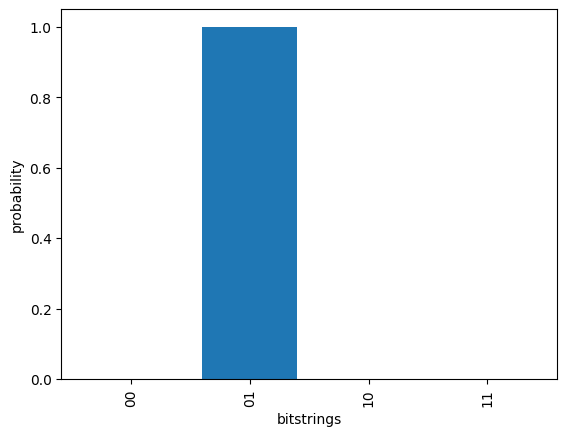

Message: 01. Results: 
Counter({'01': 1000})
TASK ID f547b3d8-034c-4f83-ba3f-e2a1bc5ef81e
isko hatao COMPLETED
Status: COMPLETED
measurement_counts: Counter({'10': 1000})
measurement_counts: Counter({'10': 1000})


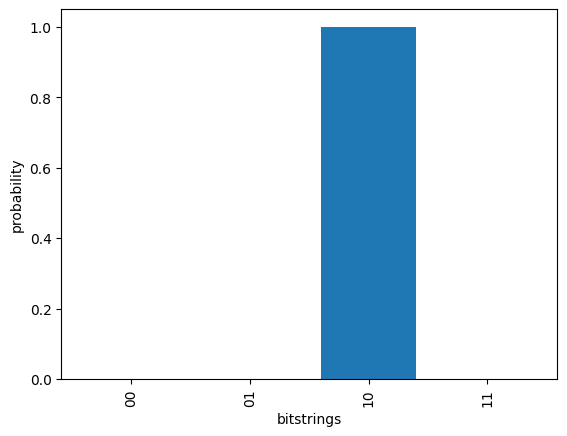

Message: 10. Results: 
Counter({'10': 1000})
TASK ID 3fdf4659-fc99-4897-9b17-327caa17a666
isko hatao COMPLETED
Status: COMPLETED
measurement_counts: Counter({'11': 1000})
measurement_counts: Counter({'11': 1000})


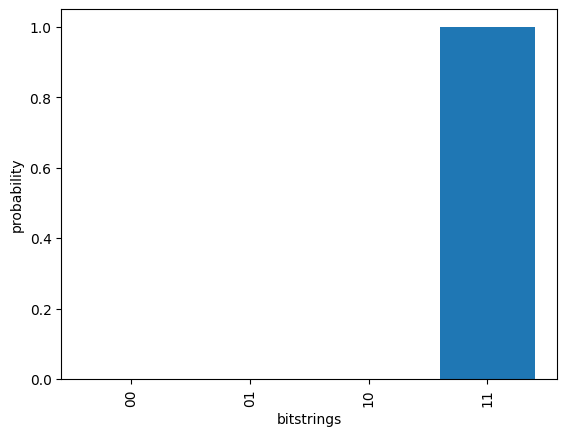

Message: 11. Results: 
Counter({'11': 1000})


In [28]:
for m in message:
    #reproducing the full circuit above by concatenating all of the gates :
    newcirc = Circuit().h([0]).cnot(0,1).add_circuit(message[m]).cnot(0,1).h([0])
    
    #Run the circuit:
    counts = get_result(device , newcirc)
    
    print("Message: " +m + ". Results: ")
    print(counts)